In [7]:
#Ayden Ballard - 905438

#Imports
import numpy as np
import matplotlib.pyplot as plt
import skimage.feature
import sklearn.mixture
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA

#Initialising training images and labels
trnImages = np.load('trnImage.npy')
trnLabels = np.load('trnLabel.npy')
#Initialising testing images and labels
testImages = np.load('tstImage.npy')
testLabels = np.load('tstLabel.npy')

def computeFeatures(image):
    # This function computes the HOG features with the parsed hyperparameters and returns the features as hog_feature. 
    # By setting visualize=True we obtain an image, hog_as_image, which can be plotted for insight into extracted HOG features.
    hog_feature, hog_as_image = skimage.feature.hog(image, visualize=True, block_norm='L2-Hys')
    return hog_feature, hog_as_image


In [8]:
#Training data variables
numberOfTrainingImages = 10000 #10,000 images, 1000 of each category
trainingImages = []
trainingFeatures = []
trainingLabels = []

#For loop to collect all of the training images with their features
for x in range(numberOfTrainingImages):
    hog_feature, hog_as_image = computeFeatures(trnImages[:,:,:,x])
    trainingFeatures.append(hog_feature)
    trainingLabels.append(trnLabels[x])

#testing data variables
numberOfTestingImages = 1000 #1000 images, 100 of each category
testingImages = []
testingFeatures = []

#For loop to collect all of the testing images with their features
for x in range(numberOfTestingImages):
    hog_feature, hog_as_image = computeFeatures(testImages[:,:,:,x])
    testingFeatures.append(hog_feature)

In [9]:
#GMM
GMM = sklearn.mixture.GaussianMixture(10)
GMM.fit(trainingFeatures)
predictions = GMM.predict(testingFeatures)
print('Accuracy on testing data is: {0:.2f}%'.format(accuracy_score(testLabels, predictions)*100))

Accuracy on testing data is: 7.40%


In [10]:
#K-means
import sklearn.cluster
kmeans = sklearn.cluster.KMeans(10) #10 clusters because there is 10 categories
kmeans.fit(trainingFeatures)
predictions = kmeans.predict(testingFeatures)
print('Accuracy on testing data is: {0:.2f}%'.format(accuracy_score(testLabels, predictions)*100))

Accuracy on testing data is: 9.60%


In [12]:
#SVM
vm = SVC(gamma='auto')
vm.fit(trainingFeatures, np.ravel(trnLabels))
predictions = vm.predict(testingFeatures)
print('Accuracy on testing data is: {0:.2f}%'.format(accuracy_score(testLabels, predictions)*100))

Accuracy on testing data is: 42.00%


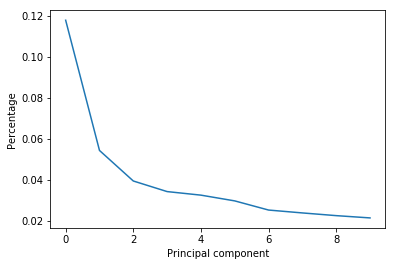

In [23]:
#PCA
pca = PCA(n_components = 10)
pca.fit(trainingFeatures)
P = pca.fit_transform(testingFeatures)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Principal component')
plt.ylabel('Percentage')
plt.show()

In [29]:
#LDA

LDA = LinearDiscriminantAnalysis(n_components = 8)
LDA.fit_transform(trainingFeatures, np.ravel(trnLabels))
predictions = LDA.predict(testingFeatures)
print('Accuracy on testing data is: {0:.2f}%'.format(accuracy_score(testLabels, predictions)*100))

Accuracy on testing data is: 49.40%
